# Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import csv
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
client_df = pd.read_csv('client_data.csv', na_values= ['n/a','\s+','N/A'])
price_df = pd.read_csv('price_data.csv', na_values= ['n/a','\s+','N/A'])

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Descriptive statistics of data

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
client_df.shape

(14606, 26)

In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [10]:
price_df.shape

(193002, 8)

In [11]:
#detect null values
client_df.isnull().values.any()
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

# Data Exploratory

In [12]:
#detect null values
price_df.isnull().values.any()
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [40]:
#explore unique data in each column with unique method for dataframe
for col in client_df:
    print(col, "::\n",  client_df[col].unique(), "\n\n")

id ::
 ['24011ae4ebbe3035111d65fa7c15bc57' 'd29c2c54acc38ff3c0614d0a653813dd'
 '764c75f661154dac3a6c254cd082ea7d' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd'] 


channel_sales ::
 ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa'] 


cons_12m ::
 [    0  4660   544 ... 87146 32270  7223] 


cons_gas_12m ::
 [  54946       0 1542867 ...    2126    3036   47940] 


cons_last_month ::
 [     0    526   1998 ... 154171   3269  11367] 


date_activ ::
 ['2013-06-15T00:00:00.000000000' '2009-08-21T00:00:00.000000000'
 '2010-04-16T00:00:00.000000000' ... '2009-04-30T00:00:00.000000000'
 '2013-03-10T00:00:00.000000000' '2004-12-29T00:00:00.000000000'] 


date_end ::
 ['2016-06-15T00:00:00.000000000' '2016-08-30T00:00:00.000

In [14]:
print(client_df.duplicated().sum())
print(price_df.duplicated().sum())

0
0


In [15]:
#1 churn rate for overall 
churn=client_df.groupby(["churn"])["churn"].count()
total= client_df['id'].count()
churn_percentage = (churn.divide(total) * 100).round(2)
print(churn_percentage)

churn
0    90.28
1     9.72
Name: churn, dtype: float64


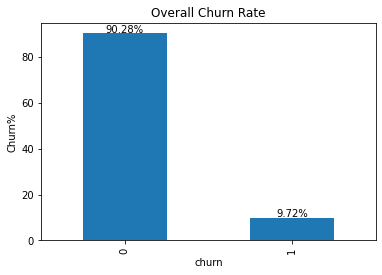

In [41]:
churn_percentage.plot(kind="bar",title="Overall Churn Rate")
plt.ylabel("Churn%")
ax = plt.gca()
# Annotate each bar with its respective value
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()  
    label = "{:.2f}%".format(y) 

    # Add the label to the plot
    ax.annotate(label,
                (x, y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,1), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.show()

In [17]:
#2 Plot type of company with churn and retention
channel_sales_churn=client_df.groupby(["channel_sales","churn"])["churn"].count()
total_per_channel = client_df.groupby("channel_sales")["churn"].count()
channel_sales_percentage = (channel_sales_churn.divide(total_per_channel, level="channel_sales") * 100).round(2)
print(channel_sales_percentage)

channel_sales                     churn
MISSING                           0         92.40
                                  1          7.60
epumfxlbckeskwekxbiuasklxalciiuu  0        100.00
ewpakwlliwisiwduibdlfmalxowmwpci  0         91.60
                                  1          8.40
fixdbufsefwooaasfcxdxadsiekoceaa  0        100.00
foosdfpfkusacimwkcsosbicdxkicaua  0         87.86
                                  1         12.14
lmkebamcaaclubfxadlmueccxoimlema  0         94.41
                                  1          5.59
sddiedcslfslkckwlfkdpoeeailfpeds  0        100.00
usilxuppasemubllopkaafesmlibmsdf  0         89.96
                                  1         10.04
Name: churn, dtype: float64


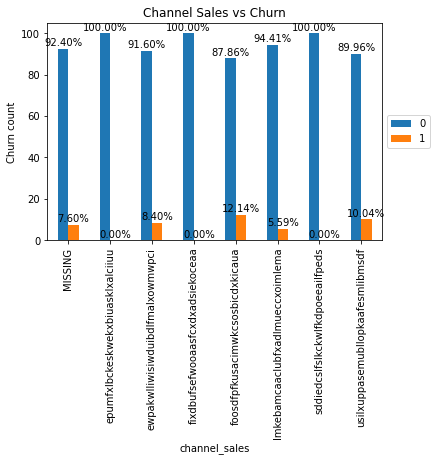

In [18]:
channel_sales_percentage.unstack().plot(kind="bar", title="Channel Sales vs Churn")
plt.ylabel("Churn count")

ax = plt.gca()

# Adjusting the ylim to make space for annotations above the bars
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) + 5)  # Add +5 or any other number depending on your data to adjust space

# Annotate each bar with its respective value
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    label = "{:.2f}%".format(y) 

    # Add the label to the plot
    ax.annotate(label,
                (x, y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,1), # move the label 10 points vertically up from the bar top
                ha='center', # horizontal alignment can be left, right or center
                va='bottom')  # vertical alignment is bottom, so the label starts just above the bar

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [19]:
#3 Plot type of company (has gas type) with churn and retention
has_gas_churn=client_df.groupby(["has_gas","churn"])["churn"].count()
total_has_gas = client_df.groupby("has_gas")["churn"].count()
has_gas_percentage = (has_gas_churn.divide(total_has_gas, level="has_gas") * 100).round(2)
print(has_gas_percentage)

has_gas  churn
f        0        89.95
         1        10.05
t        0        91.81
         1         8.19
Name: churn, dtype: float64


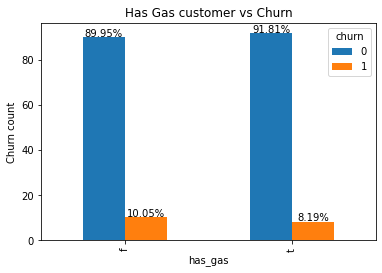

In [20]:
has_gas_percentage.unstack().plot(kind="bar",title="Has Gas customer vs Churn")
plt.ylabel("Churn count")

ax = plt.gca()

# Annotate each bar with its respective value
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()  
    label = "{:.2f}%".format(y) 

    # Add the label to the plot
    ax.annotate(label,
                (x, y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,1), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.show()


In [21]:
#4 Plot type of origin_up  (code of the electricity campaign) with churn and retention
origin_up_churn=client_df.groupby(["origin_up","churn"])["churn"].count()
total_origin_up = client_df.groupby("origin_up")["churn"].count()
origin_up_percentage = (origin_up_churn.divide(total_origin_up, level="origin_up") * 100).round(2)
print(origin_up_percentage)

origin_up                         churn
MISSING                           0         93.75
                                  1          6.25
ewxeelcelemmiwuafmddpobolfuxioce  0        100.00
kamkkxfxxuwbdslkwifmmcsiusiuosws  0         93.99
                                  1          6.01
ldkssxwpmemidmecebumciepifcamkci  0         91.61
                                  1          8.39
lxidpiddsbxsbosboudacockeimpuepw  0         87.42
                                  1         12.58
usapbepcfoloekilkwsdiboslwaxobdp  0        100.00
Name: churn, dtype: float64


In [22]:
total_origin_up

origin_up
MISSING                               64
ewxeelcelemmiwuafmddpobolfuxioce       1
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
lxidpiddsbxsbosboudacockeimpuepw    7097
usapbepcfoloekilkwsdiboslwaxobdp       2
Name: churn, dtype: int64

In [23]:
origin_up_churn

origin_up                         churn
MISSING                           0          60
                                  1           4
ewxeelcelemmiwuafmddpobolfuxioce  0           1
kamkkxfxxuwbdslkwifmmcsiusiuosws  0        4036
                                  1         258
ldkssxwpmemidmecebumciepifcamkci  0        2884
                                  1         264
lxidpiddsbxsbosboudacockeimpuepw  0        6204
                                  1         893
usapbepcfoloekilkwsdiboslwaxobdp  0           2
Name: churn, dtype: int64

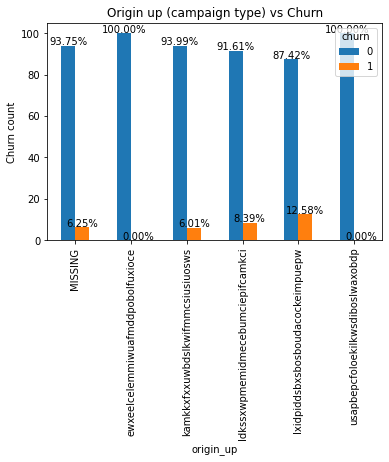

In [24]:
origin_up_percentage.unstack().plot(kind="bar",title="Origin up (campaign type) vs Churn")
plt.ylabel("Churn count")

ax = plt.gca()

# Annotate each bar with its respective value
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()  
    label = "{:.2f}%".format(y) 

    # Add the label to the plot
    ax.annotate(label,
                (x, y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,1), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.show()


In [25]:
churn_df = client_df[client_df['churn'] == 1]

In [26]:
churn_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.419000e+03,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.0
mean,7.886248e+04,9235.411557,7205.239605,1962.861938,1374.441860,1.231853,72.010937,0.136470,0.054873,43.332143,151.139331,30.468682,30.468682,1.260042,228.361938,4.633545,19.387827,1.0
std,2.604333e+05,49685.387987,26795.549578,2756.320036,2691.815516,5.722344,70.802701,0.023836,0.049634,3.293273,290.522837,26.306684,26.306684,0.595614,705.675542,1.531853,16.613367,0.0
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092453,0.000000,40.606701,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,6.000000,1.0
25%,5.836000e+03,0.000000,0.000000,503.975000,0.000000,0.000000,16.275000,0.115744,0.000000,40.606701,0.000000,17.130000,17.130000,1.000000,52.605000,4.000000,13.150000,1.0
50%,1.452900e+04,0.000000,740.000000,1152.350000,326.000000,0.000000,19.970000,0.142819,0.086803,44.311378,41.400000,26.040000,26.040000,1.000000,121.860000,4.000000,13.856000,1.0
75%,4.075600e+04,0.000000,3095.000000,2525.240000,1688.500000,0.000000,131.835000,0.145789,0.099545,44.311378,187.755000,34.680000,34.680000,1.000000,271.935000,6.000000,19.800000,1.0
max,3.955941e+06,828344.000000,448776.000000,61357.170000,37891.000000,30.000000,548.410000,0.273963,0.168092,59.266378,4205.640000,299.640000,299.640000,5.000000,24570.650000,13.000000,320.000000,1.0


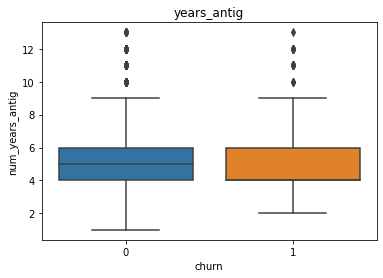

In [27]:
sns.boxplot(data=client_df, x='churn', y='num_years_antig')
plt.title('years_antig')
plt.show()

In [28]:
# Calculate the distribution of client antiquity by churn status
antiquity_churn=client_df.groupby(["num_years_antig","churn"])["churn"].count()
total_antiquity = client_df.groupby("num_years_antig")["churn"].count()
antiquity_churn_percentage = (antiquity_churn.divide(total_antiquity, level="num_years_antig") * 100).round(2)
print(antiquity_churn_percentage)

num_years_antig  churn
1                0        100.00
2                0         72.73
                 1         27.27
3                0         86.48
                 1         13.52
4                0         88.15
                 1         11.85
5                0         91.37
                 1          8.63
6                0         92.89
                 1          7.11
7                0         91.75
                 1          8.25
8                0         95.15
                 1          4.85
9                0         98.91
                 1          1.09
10               0         95.06
                 1          4.94
11               0         93.51
                 1          6.49
12               0         90.00
                 1         10.00
13               0         92.31
                 1          7.69
Name: churn, dtype: float64


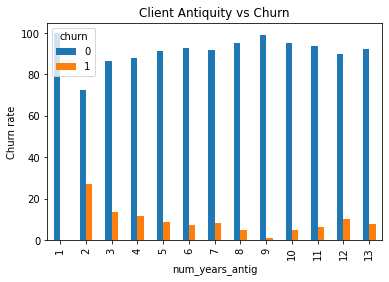

In [29]:
# Assuming you've already calculated antiquity_churn_percentage using the provided code
antiquity_churn_percentage.unstack().plot(kind="bar", title="Client Antiquity vs Churn")
plt.ylabel("Churn rate")
plt.show()


## Churn rate and Price sensitivity

In [30]:
#Transform date columns to datetime type 
client_df["date_activ"]=pd.to_datetime(client_df["date_activ"],format='%Y-%m-%d') 
client_df["date_end"]=pd.to_datetime(client_df["date_end"],format='%Y-%m-%d') 
client_df["date_modif_prod"]=pd.to_datetime(client_df["date_modif_prod"],format='%Y-%m-%d') 
client_df["date_renewal"]=pd.to_datetime(client_df["date_renewal"],format='%Y-%m-%d')
price_df['price_date']=pd.to_datetime(price_df['price_date'],format='%Y-%m-%d')

In [31]:

# Create mean average data for different timeframes
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Rename columns and compute the sum of variable and fixed prices
for df, prefix in zip([mean_year, mean_6m, mean_3m], ["mean_year", "mean_6m", "mean_3m"]):
    df[f"{prefix}_price_off_peak"] = df["price_off_peak_var"] + df["price_off_peak_fix"]
    df[f"{prefix}_price_peak"] = df["price_peak_var"] + df["price_peak_fix"]
    df[f"{prefix}_price_mid_peak"] = df["price_mid_peak_var"] + df["price_mid_peak_fix"]
    df.rename(
        index=str, 
        columns={
            "price_off_peak_var": f"{prefix}_price_off_peak_var",
            "price_peak_var": f"{prefix}_price_peak_var",
            "price_mid_peak_var": f"{prefix}_price_mid_peak_var",
            "price_off_peak_fix": f"{prefix}_price_off_peak_fix",
            "price_peak_fix": f"{prefix}_price_peak_fix",
            "price_mid_peak_fix": f"{prefix}_price_mid_peak_fix"
        }, inplace=True
    )

# Merge the dataframes
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')


In [32]:
price_features.columns

Index(['id', 'mean_year_price_off_peak_var', 'mean_year_price_peak_var',
       'mean_year_price_mid_peak_var', 'mean_year_price_off_peak_fix',
       'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
       'mean_year_price_off_peak', 'mean_year_price_peak',
       'mean_year_price_mid_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix', 'mean_6m_price_peak_fix',
       'mean_6m_price_mid_peak_fix', 'mean_6m_price_off_peak',
       'mean_6m_price_peak', 'mean_6m_price_mid_peak',
       'mean_3m_price_off_peak_var', 'mean_3m_price_peak_var',
       'mean_3m_price_mid_peak_var', 'mean_3m_price_off_peak_fix',
       'mean_3m_price_peak_fix', 'mean_3m_price_mid_peak_fix',
       'mean_3m_price_off_peak', 'mean_3m_price_peak',
       'mean_3m_price_mid_peak'],
      dtype='object')

In [33]:
mean_year.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000


In [34]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [35]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


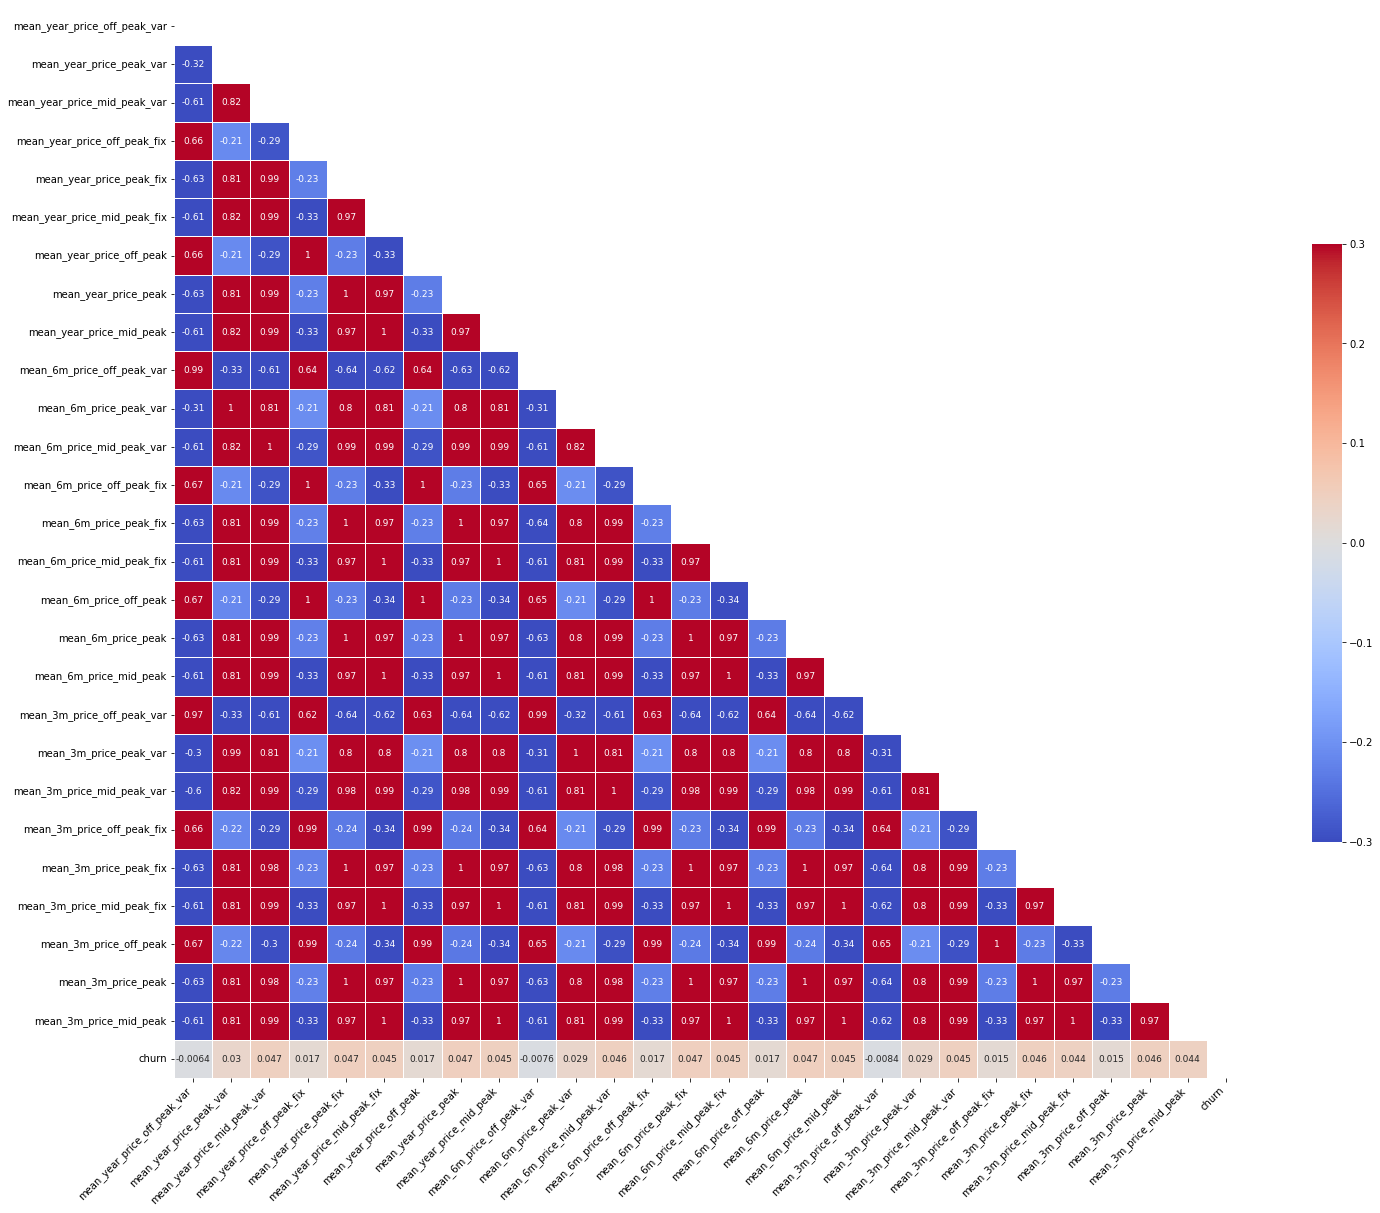

In [36]:
corr = price_analysis.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(24, 22))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, vmin=-.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={'size': 9})

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()


In [37]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [38]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [39]:
merged_data.to_csv('cleaned_data.csv')